📋 Categorical columns: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']


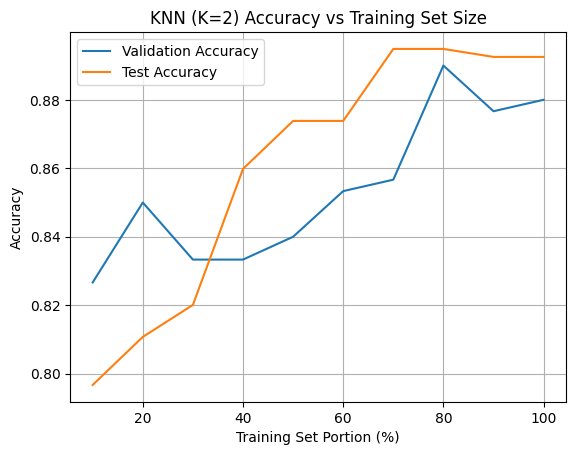

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# 1️⃣ Load dataset
df = pd.read_csv(r"data/CAR_EVALUATION.csv")
# print(df.head())

TARGET = "Target"

X = df.drop(columns=[TARGET])
y = df[TARGET]


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=1000, shuffle=True, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=428, shuffle=True, random_state=42, stratify=y_temp
)

cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
print("📋 Categorical columns:", cat_cols)

ohe = OneHotEncoder()

X_train_enc = ohe.fit_transform(X_train)
X_val_enc = ohe.transform(X_val)
X_test_enc = ohe.transform(X_test)


le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
val_accuracies = []
test_accuracies = []

for size in train_sizes:
    # pick the first portion of the training set
    n_samples = int(size * X_train_enc.shape[0])
    X_part = X_train_enc[:n_samples]
    y_part = y_train_enc[:n_samples]

    # train KNN with K=2
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_part, y_part)

    # predict on validation and test
    y_val_pred = knn.predict(X_val_enc)
    y_test_pred = knn.predict(X_test_enc)

    # compute accuracy
    val_acc = accuracy_score(y_val_enc, y_val_pred)
    test_acc = accuracy_score(y_test_enc, y_test_pred)

    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

# plot
plt.plot([s*100 for s in train_sizes], val_accuracies, label="Validation Accuracy")
plt.plot([s*100 for s in train_sizes], test_accuracies, label="Test Accuracy")
plt.xlabel("Training Set Portion (%)")
plt.ylabel("Accuracy")
plt.title("KNN (K=5) Accuracy vs Training Set Size")
plt.legend()
plt.grid(True)
plt.show()


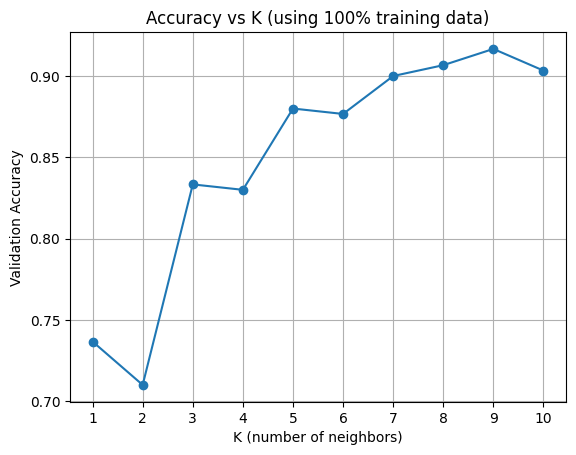

Best K = 9 with validation accuracy = 0.917


In [31]:
k_values = range(1, 11)
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_enc, y_train_enc)  # use 100% of training data

    y_val_pred = knn.predict(X_val_enc)
    acc = accuracy_score(y_val_enc, y_val_pred)
    val_accuracies.append(acc)

# Plot the results
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel("K (number of neighbors)")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy vs K (using 100% training data)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[val_accuracies.index(max(val_accuracies))]
print(f"Best K = {best_k} with validation accuracy = {max(val_accuracies):.3f}")